## Importing and uploading 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler,FunctionTransformer,PolynomialFeatures
#from fuzzywuzzy import fuzz,process
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler,FunctionTransformer,PowerTransformer,MinMaxScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, ExtraTreesRegressor, BaggingRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,SGDRegressor,ElasticNet,Ridge,Lasso
from sklearn.svm import SVR
#from xgboost.sklearn import XGBRegressor
import re

In [2]:
df=pd.read_csv("train2.csv")
test=pd.read_csv("Test2.csv")

In [3]:
df.head()

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,WOOW Sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,R,2.5,75492 KM,1008,21012
1,14392,I love TOYOTA,NaN,NaN,Minivan3,5.0,Metallic,-,Gas,4.0 cyl,R,2.4,220000 KM,-96,11917
2,9822,hyundai,H1,2009,MINIVAN,0.0,Metallic,1185$,Dies,4.0,R,2.5,TOTAL 50653 km,4 count,22433
3,17123,opel,Corsa,NaN,Hatchback,5.0,Jet Black,-,NaN,4.0,auto,0,230000 KM,0,5645
4,11133,subaru,I own Outback.,2007,Hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000 KM,4,10976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   Brand              6294 non-null   object 
 2   VehicleModel       6303 non-null   object 
 3   ManufacturingYear  6305 non-null   object 
 4   Type               6315 non-null   object 
 5   rating             6310 non-null   float64
 6   color              4876 non-null   object 
 7   Duty               7000 non-null   object 
 8   fuel               6304 non-null   object 
 9   CylinderCount      7000 non-null   object 
 10  type of gear       6308 non-null   object 
 11  capacity           7000 non-null   object 
 12  Odometer           7000 non-null   object 
 13  #airbags           7000 non-null   object 
 14  price              7000 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 820.4+ KB


In [5]:
df.isna().sum()

ID                      0
Brand                 706
VehicleModel          697
ManufacturingYear     695
Type                  685
rating                690
color                2124
Duty                    0
fuel                  696
CylinderCount           0
type of gear          692
capacity                0
Odometer                0
#airbags                0
price                   0
dtype: int64

In [6]:
nans=df.isna().sum().sort_values(ascending=False)
pct=nans*100/df.shape[0]
uniques=df.nunique()
noted=pd.concat([nans,pct,uniques,df.dtypes],axis=1)
noted.columns=['Null count','Null percentage','n_unique values','data_type']
noted

,Null count,Null percentage,n_unique values,data_type
color,2124,30.342857,16,object
Brand,706,10.085714,185,object
VehicleModel,697,9.957143,1480,object
fuel,696,9.942857,7,object
ManufacturingYear,695,9.928571,555,object
type of gear,692,9.885714,7,object
rating,690,9.857143,15,float64
Type,685,9.785714,81,object
ID,0,0.000000,7000,int64
Duty,0,0.000000,1173,object


### Cleaning color

In [7]:
df["color"].value_counts()

color
Jet Black        1239
Pearl White      1083
Metallic          995
Charcoal          628
Sapphire Blue     371
Crimson           166
Emerald Green      77
Tangerine          66
Gold               49
Chocolate          47
Ruby Red           44
Sky Blue           35
Sand               34
Lemon Yellow       30
Royal Purple        7
Rose Pink           5
Name: count, dtype: int64

In [8]:
df["color"].unique()

array([nan, 'Metallic', 'Jet Black', 'Sapphire Blue', 'Pearl White',
       'Charcoal', 'Gold', 'Crimson', 'Tangerine', 'Sand',
       'Emerald Green', 'Lemon Yellow', 'Chocolate', 'Sky Blue',
       'Ruby Red', 'Rose Pink', 'Royal Purple'], dtype=object)

> I couldn't notice any thing abnormal

### Cleaning fuel

In [9]:
df["fuel"].value_counts()

fuel
Gas                3272
Dies               1291
Electric Hybrid    1250
other               307
Natural Gas         157
hyb                  26
others                1
Name: count, dtype: int64

In [10]:
filt1=df["fuel"]=="Natural Gas"
df.loc[filt1,"fuel"]="Gas"
filt2=df["fuel"]=="Dies"
df.loc[filt2,"fuel"]="Diesel"
filt3=df["fuel"]=="hyb"
df.loc[filt3,"fuel"]="hybrid"
filt4=df["fuel"]=="others"
df.loc[filt4,"fuel"]="other"

In [11]:
df["fuel"].value_counts()

fuel
Gas                3429
Diesel             1291
Electric Hybrid    1250
other               308
hybrid               26
Name: count, dtype: int64

In [12]:
df["fuel"].unique()

array(['Gas', 'Diesel', nan, 'Electric Hybrid', 'other', 'hybrid'],
      dtype=object)

> changes: 
natural gas into gas as they are the same

>Dies into diesel

>hyb int hybrid

### Cleaning ManufacturingYear

In [13]:
df["ManufacturingYear"].unique()

array(['2017', nan, '2009', '2007', '3010', '1999', '2012', '2011',
       '2014', '2015', '2006', '2105', '2013,', '2010', '2017{',
       '1-1-2003', '2016', '1998', '2018', '2008', '2015+', '2012"',
       '2013', '2111', '1-1-2020', '2005', '2017*', '2004', '2016.',
       '2015#', '1910', '2017&', '1914', '1-1-2013', '3009', '2009&',
       '2018}', '14years old', '1-1-2014', '2001', '2015`', '2112',
       '1997', '2014@', '1917', '2014+', '2013*', '1-1-2011', '1-1-2008',
       '2012,', '2003', '1-1-2007', '15years old', '1916', '1-1-2012',
       '1912', '2010~', '2020', '2002>', '2110', '2005>', '2115',
       '1-1-2005', '2009%', '2019', '10years old', '1-1-2002', '2015@',
       '3013', '1907', '2010*', '2000', '1996_', '12years old', '2011;',
       '2017_', '13years old', '3014', '2017(', '2011,', '11years old',
       '7years old', '1-1-2010', '3004', '1996|', '1913', '2014|',
       '1-1-2016', '2016[', '1900', "2009'", '1902', '2117', '1-1-2009',
       '8years old', '2

In [14]:
year_sp=df["ManufacturingYear"].str.split("-")
year_sp

0              [2017]
1                 NaN
2              [2009]
3                 NaN
4              [2007]
            ...      
6995    [12years old]
6996           [2114]
6997    [12years old]
6998           [2112]
6999    [12years old]
Name: ManufacturingYear, Length: 7000, dtype: object

In [15]:
year_sp=year_sp.apply(lambda x: x[-1] if isinstance(x, list) else np.nan)


In [16]:
year_sp=year_sp.apply(lambda x:re.sub(r"[a-zA-Z]", '', x) if isinstance(x, str) else np.nan)
year_sp=year_sp.apply(lambda x:re.sub(r'[^a-zA-Z0-9\s]', '',x) if isinstance(x, str) else np.nan)
year_sp=year_sp.apply(lambda x:x.strip(" ") if isinstance(x, str) else np.nan)


In [17]:
year_sp.unique()

array(['2017', nan, '2009', '2007', '3010', '1999', '2012', '2011',
       '2014', '2015', '2006', '2105', '2013', '2010', '2003', '2016',
       '1998', '2018', '2008', '2111', '2020', '2005', '2004', '1910',
       '1914', '3009', '14', '2001', '2112', '1997', '1917', '15', '1916',
       '1912', '2002', '2110', '2115', '2019', '10', '3013', '1907',
       '2000', '1996', '12', '13', '3014', '11', '7', '3004', '1913',
       '1900', '1902', '2117', '8', '2118', '1995', '6', '2113', '3012',
       '1915', '9', '1911', '21', '2116', '2098', '26', '1918', '2114',
       '3008', '3006', '28', '2107', '2119', '1908', '24', '1992', '2099',
       '20', '1985', '1909', '3007', '2103', '', '23', '1905', '33',
       '1983', '3011', '2104', '3015', '1904', '1993', '17', '1994',
       '1988', '3017', '25', '1898', '1903', '3018', '2998', '3016', '19',
       '16', '1982', '29', '2108', '18', '5', '2106', '3003', '1896',
       '2100', '1893', '1987', '1991', '22', '2120', '1990', '2102',
    

In [18]:
year_sp.isna().sum()

695

In [19]:
df["year"]=year_sp


In [20]:
df["year"]=pd.to_numeric(df['year'], errors='coerce',downcast="integer")

In [21]:
df["year"].isna().sum()

715

In [22]:
year_filt=df["year"]>2024

In [23]:
df.loc[year_filt,"year"]

5       3010.0
12      2105.0
30      2111.0
49      3009.0
58      2112.0
         ...  
6953    2109.0
6967    3008.0
6990    3012.0
6996    2114.0
6998    2112.0
Name: year, Length: 421, dtype: float64

In [24]:
df["year"].value_counts()

year
2012.0    569
2014.0    563
2013.0    512
2011.0    443
2010.0    409
         ... 
1939.0      1
2120.0      1
1893.0      1
33.0        1
1895.0      1
Name: count, Length: 146, dtype: int64

In [25]:
year_filt2=df["year"]<100

In [26]:
df.loc[year_filt2,"year"]=2024-df.loc[year_filt2,"year"]

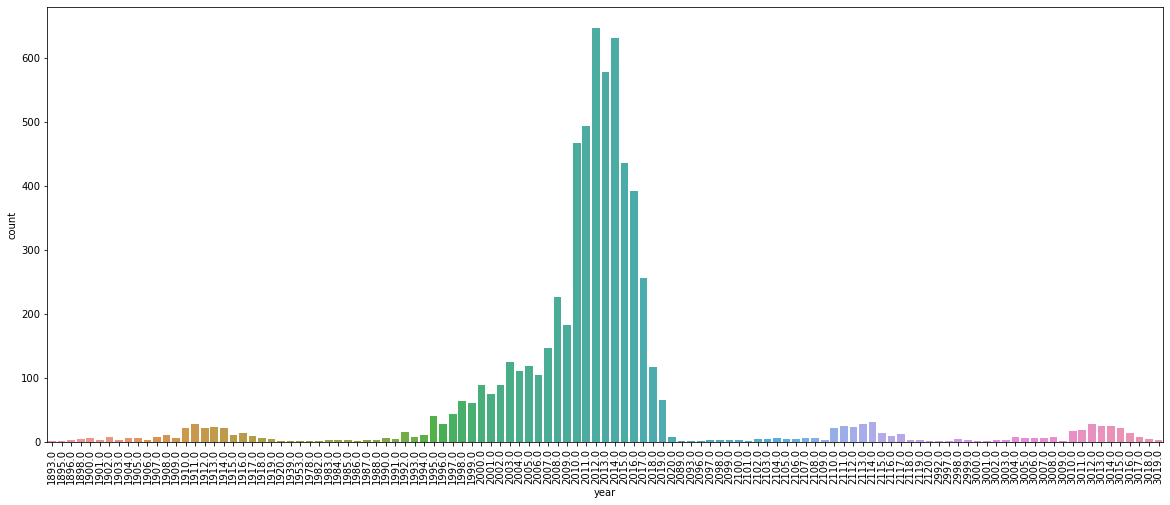

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(x=df["year"])
plt.xticks(rotation=90)
plt.show()

In [28]:
df["year"].isna().sum()

715

> I removed any strings and any spacial charachters from the data using regex


> imputed the value that after 2024 and before 1600 as missing values

### Clean type

In [29]:
df["Type"].unique()

array(['WOOW Sedan', 'Minivan3', 'MINIVAN', 'Hatchback', 'sedan', 'SEDAN',
       'Pickup3', 'jeep', 'Minivan', 'HATCHBACK', 'minivan', 'hatchback',
       'JEEP', 'microbus', nan, 'Jeep1', 'Sedan0', 'Coupe', 'Sedan3',
       'Hatchback3', 'Sedan', 'Jeep0', 'WOOW Hatchback', 'WOOW Jeep',
       'Hatchback1', 'WOOW Coupe', 'UNIVERSAL', 'Hatchback2', 'Jeep2',
       'Hatchback4', 'Sedan4', 'Sedan1', 'Jeep', 'WOOW Minivan', 'Jeep4',
       'Hatchback0', 'Goods Wagon', 'universal', 'WOOW Goods wagon',
       'MICROBUS', 'Minivan0', 'Coupe1', 'goods wagon', 'pickup', 'Jeep3',
       'Sedan2', 'coupe', 'Pickup1', 'COUPE', 'CABRIOLET', 'Universal0',
       'Microbus', 'WOOW Universal', 'Goods wagon1', 'WOOW Microbus',
       'Minivan2', 'GOODS WAGON', 'cabriolet', 'Goods wagon0', 'Coupe4',
       'Universal', 'Goods wagon2', 'Microbus4', 'Coupe3', 'Goods wagon4',
       'Limousine', 'PICKUP', 'Microbus0', 'Coupe0', 'Goods wagon3',
       'Universal3', 'Minivan1', 'Microbus3', 'Microbus1', 'Un

In [30]:
typo=df["Type"]

In [31]:
chars=['1','2','3','4','5','6','7','8','9','0',"WOOW"]
for c in chars:
    typo=typo.apply(lambda x:x.replace(c,'') if isinstance(x, str) else np.nan)
typo=typo.apply(lambda x:x.lower() if isinstance(x, str) else np.nan)
typo=typo.apply(lambda x:x.strip() if isinstance(x, str) else np.nan)

In [32]:
typo.unique()

array(['sedan', 'minivan', 'hatchback', 'pickup', 'jeep', 'microbus', nan,
       'coupe', 'universal', 'goods wagon', 'cabriolet', 'limousine'],
      dtype=object)

In [33]:
typo.isna().sum()

685

In [34]:
df["Type"]=typo

> Rmoved un needed words and digits

### Cleaning rating

In [35]:
rat_filt=df["rating"]

In [36]:
rat_filt.unique()

array([ 0.,  5.,  4., nan,  2.,  6.,  3.,  8.,  1.,  7., -1., -2., -3.,
        9., 10., -4.])

In [37]:
rat_filt=rat_filt.apply(lambda x:-x if x<0 else x)

In [38]:
rat_filt.unique()

array([ 0.,  5.,  4., nan,  2.,  6.,  3.,  8.,  1.,  7.,  9., 10.])

In [39]:
df["rating"]=rat_filt

In [40]:
df["rating"].isna().sum()

690

> there was negative values 

### Cleaning color 

In [41]:
df["color"].unique()

array([nan, 'Metallic', 'Jet Black', 'Sapphire Blue', 'Pearl White',
       'Charcoal', 'Gold', 'Crimson', 'Tangerine', 'Sand',
       'Emerald Green', 'Lemon Yellow', 'Chocolate', 'Sky Blue',
       'Ruby Red', 'Rose Pink', 'Royal Purple'], dtype=object)

> noticed notthing 

### cleaning CylinderCount

In [42]:
cyl=df["CylinderCount"]
cyl.unique()

array(['4.0', '4.0 cyl', '8.0', '8.0 cyl', '6.0 cyl', '6.0', '14.0', '0',
       '5.0', '16.0', '18.0', '3.0', '3.0 cyl', '15.0', '10.0', '11.0',
       '2.0 cyl', '5.0 cyl', '9.0', '10.0 cyl', '1.0', '12.0 cyl', '2.0',
       '16.0 cyl', '13.0', '1.0 cyl', '12.0', '7.0'], dtype=object)

In [43]:
cyl=cyl.apply(lambda x:x.replace(" cyl",''))

In [44]:
df["CylinderCount"]=cyl

In [45]:
df["CylinderCount"].unique()

array(['4.0', '8.0', '6.0', '14.0', '0', '5.0', '16.0', '18.0', '3.0',
       '15.0', '10.0', '11.0', '2.0', '9.0', '1.0', '12.0', '13.0', '7.0'],
      dtype=object)

In [46]:
df["CylinderCount"].isna().sum()

0

In [47]:
df["CylinderCount"]=pd.to_numeric(df['CylinderCount'], errors='coerce')

In [48]:
df["CylinderCount"].isna().sum()

0

> removed unneeded char 

### type of gear

In [49]:
df["type of gear"].unique()

array(['R', 'auto', nan, 'manual', 'others', 'MANUAL', 'AUTO', 'gear'],
      dtype=object)

In [50]:
df["type of gear"]=df["type of gear"].apply(lambda x:x.lower() if isinstance(x, str) else np.nan)

In [51]:
df["type of gear"].unique()

array(['r', 'auto', nan, 'manual', 'others', 'gear'], dtype=object)

In [52]:
df["type of gear"].value_counts()

type of gear
auto      3423
others    1228
gear       639
r          635
manual     383
Name: count, dtype: int64

In [53]:
#gear_filt=df["type of gear"].isin(["r","gear"])

In [54]:
#df.loc[gear_filt,"type of gear"]="others"

> turned into lower case and abnormal types into others

### Capacity

In [55]:
df["capacity"].unique()

array(['2.5', '2.4', '0', '2', '5', '3', '1.3', '1.5', '1.6', '1.8',
       '3.5', '2.7 Turbo', '1.8 Turbo', '2.7', '2.5 Turbo', '3.3', '1.7',
       '2.2', '2.2 Turbo', '4', '1.4', '4.8', '1.2', '2.3', '1.6 Turbo',
       '4.7', '2.0 Turbo', '2.8 Turbo', '3.2', '5.5', '6.2', '4.6', '3.7',
       '1', '3.0 Turbo', '1.9 Turbo', '2.4 Turbo', '5.0 Turbo', '3.6',
       '4.4', '1.4 Turbo', '2.6', '3.2 Turbo', '0.6 Turbo', '1.5 Turbo',
       '6.3', '3.8', '5.7', '1.9', '4.5', '5.9', '0.3', '5.5 Turbo',
       '4.5 Turbo', '4.2', '3.5 Turbo', '0.4', '0.1', '0.2', '0.8',
       '4.4 Turbo', '2.3 Turbo', '4.7 Turbo', '2.9 Turbo', '1.7 Turbo',
       '6.7', '2.1 Turbo', '2.8', '2.9', '0.7', '2.1', '1.3 Turbo', '5.4',
       '5.4 Turbo', '3.4', '5.3', '4.3', '0.9', '0.8 Turbo', '0.6',
       '3.6 Turbo', '1.0 Turbo', '5.6', '5.2', '1.1', '4.8 Turbo', '0.5'],
      dtype=object)

In [56]:
df["capacity"]=df["capacity"].apply(lambda x:x.replace("Turbo",'') if isinstance(x, str) else np.nan)
df["capacity"]=df["capacity"].apply(lambda x:x.replace(" ",'') if isinstance(x, str) else np.nan)

In [57]:
df["capacity"].unique()

array(['2.5', '2.4', '0', '2', '5', '3', '1.3', '1.5', '1.6', '1.8',
       '3.5', '2.7', '3.3', '1.7', '2.2', '4', '1.4', '4.8', '1.2', '2.3',
       '4.7', '2.0', '2.8', '3.2', '5.5', '6.2', '4.6', '3.7', '1', '3.0',
       '1.9', '5.0', '3.6', '4.4', '2.6', '0.6', '6.3', '3.8', '5.7',
       '4.5', '5.9', '0.3', '4.2', '0.4', '0.1', '0.2', '0.8', '2.9',
       '6.7', '2.1', '0.7', '5.4', '3.4', '5.3', '4.3', '0.9', '1.0',
       '5.6', '5.2', '1.1', '0.5'], dtype=object)

In [58]:
df["capacity"].isna().sum()

0

In [59]:
df["capacity"]=pd.to_numeric(df['capacity'], errors='coerce')

In [60]:
df["capacity"].isna().sum()

0

In [61]:
x=df["capacity"]<0
x.sum()

0

> removed unneeded char and spaces

### Odometer

In [62]:
x=df["Odometer"].unique()

In [63]:
x

array(['75492 KM', '220000 KM', 'TOTAL 50653 km', ..., '156802  kilo',
       '314373 KM', '131627'], dtype=object)

In [64]:
df["Odometer"]=df["Odometer"].apply(lambda x:re.sub(r"[a-zA-Z]", '', x) if isinstance(x, str) else np.nan)
df["Odometer"]=df["Odometer"].apply(lambda x:x.replace(" ",'') if isinstance(x, str) else np.nan)

In [65]:
df["Odometer"].isna().sum()

0

In [66]:
df["Odometer"].min()

'0'

In [67]:
pd.set_option("display.max_columns",None)

In [68]:
df["Odometer"]=pd.to_numeric(df['Odometer'], errors='coerce')

In [69]:
x=df["Odometer"]<0

In [70]:
x.sum()

0

>> removed unneeded char 

## airbages

In [71]:
df["#airbags"].unique()

array(['1008', '-96', '4 count', '0  ', '4  ', '12', '6 count', '8', '4',
       '12,', '6~', '106', '6', '2', '8 bags', '12<', '0',
       'ONLY 10 AIRBAG', '12 count', 'ONLY 4 AIRBAG', '1012', '10',
       '12 bags', '4 bags', 'ONLY 8 AIRBAG', '5', '8 count',
       'ONLY 0 AIRBAG', '12/', 'ONLY 6 AIRBAG', '12)', '-100', '8=',
       'ONLY 12 AIRBAG', '12  ', '108', '4<', '-94', '12|', '6 bags',
       '2 count', '12`', '4]', '8$', '-88', '10 count', '6  ', '12>',
       '112', '6(', '11', '110', '4@', '4&', '0 count', '4{', '4#', '104',
       '1005', '12~', '4!', '2  ', '5 count', '16 bags', '6?', '1', '-92',
       '100', '1004', '9', '14', '4$', '4,', '12!', '8  ', '-90', '12&',
       '6/', '1 count', 'ONLY 2 AIRBAG', '0~', "8'", '2 bags', '4[',
       '10 bags', '8&', '0 bags', '12#', "4'", '2<', '0#', "0'", '13',
       '2(', '2*', '4"', '4(', '0-', '8:', '2,', '8@', 'ONLY 5 AIRBAG',
       '-98', '4_', '0"', '0[', '10  ', '7', '12}', '1002', '6"', '6_',
       '6:', '4;', '10

In [72]:
df["#airbags"]=df["#airbags"].apply(lambda x:re.sub(r"[a-zA-Z]", '', x))
df["#airbags"]=df["#airbags"].apply(lambda x:re.sub(r'[^a-zA-Z0-9\s]', '', x))


In [73]:
df["#airbags"]=df["#airbags"].apply(lambda x:x.strip(" ") if isinstance(x, str) else np.nan)

In [74]:
df["#airbags"].unique()

array(['1008', '96', '4', '0', '12', '6', '8', '106', '2', '10', '1012',
       '5', '100', '108', '94', '88', '112', '11', '110', '104', '1005',
       '16', '1', '92', '1004', '9', '14', '90', '13', '98', '7', '1002',
       '1000', '105', '1010', '1007', '116', '3', '102', '99', '1006',
       '1016', '15', '101', '111', '97', '107', '109', '95'], dtype=object)

In [75]:
df["#airbags"].isna().sum()

0

In [76]:
df["#airbags"]=pd.to_numeric(df['#airbags'], errors='coerce')

In [77]:
#filt=df["#airbags"]>150

In [78]:
#df.loc[filt,"#airbags"]=np.nan

In [79]:
x=df["#airbags"]<0

In [80]:
x.sum()

0

>removed unneeded strings and special chars

In [81]:
df

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price,year
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,r,2.5,75492,1008,21012,2017.0
1,14392,I love TOYOTA,NaN,NaN,minivan,5.0,Metallic,-,Gas,4.0,r,2.4,220000,96,11917,NaN
2,9822,hyundai,H1,2009,minivan,0.0,Metallic,1185$,Diesel,4.0,r,2.5,50653,4,22433,2009.0
3,17123,opel,Corsa,NaN,hatchback,5.0,Jet Black,-,NaN,4.0,auto,0.0,230000,0,5645,NaN
4,11133,subaru,I own Outback.,2007,hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000,4,10976,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,7341,Chevrolet,ORLANDO,12years old,jeep,NaN,Gold,642$,Diesel,0.0,gear,2.0,156802,4,16894,2012.0
6996,5105,BMW,I own X5.,2114,jeep,2.0,Pearl White,915$,Diesel,6.0,auto,3.0,110715,0,16621,2114.0
6997,7223,toyota,NaN,12years old,sedan,0.0,NaN,781,Electric Hybrid,4.0,auto,2.5,314373,12,392,2012.0
6998,12184,toyota,Camry,2112,sedan,1.0,Metallic,781 pound,Gas,14.0,r,2.5,80000,12,17249,2112.0


In [82]:
df["ManufacturingYear"]=df["year"]

In [83]:
df.drop("year",axis=1,inplace=True)

### Duty 

In [84]:
df["Duty"].unique()

array(['I had to pay a substantial $1249 levy on my new car purchase.',
       '-', '1185$', ..., '2909$',
       'The car levy amounted is 893 per vehicle.', '965'], dtype=object)

In [85]:
df["Duty"]=df["Duty"].apply(lambda x:re.sub(r"[a-zA-Z]", '', x) if isinstance(x, str) else np.nan)
df["Duty"]=df["Duty"].apply(lambda x:re.sub(r'[^a-zA-Z0-9\s]', '', x) if isinstance(x, str) else np.nan)
df["Duty"]=df["Duty"].apply(lambda x:x.strip(" ") if isinstance(x, str) else np.nan)

In [86]:
df["Duty"].isna().sum()

0

In [87]:
df["Duty"].value_counts()

Duty
        2578
765      147
640      132
891      121
639      106
        ... 
1413       1
682        1
9362       1
4283       1
965        1
Name: count, Length: 561, dtype: int64

In [88]:
df["Duty"]=pd.to_numeric(df['Duty'], errors='coerce')

>removed unneeded strings and special chars

### VehicleModel

In [89]:
df["VehicleModel"].unique()

array(["I have the fastest model ever.. yes you got it right it's Mazda 6 TOURING",
       nan, 'H1', ..., 'Navigator',
       'my model which is RAV 4 L is the best', 'I own X-type.'],
      dtype=object)

In [90]:
df["VehicleModel"][0]

"I have the fastest model ever.. yes you got it right it's Mazda 6 TOURING"

In [91]:
x=df["VehicleModel"].value_counts()
x[x==1]

VehicleModel
I have the fastest model ever.. yes you got it right it's IX35           1
I have the fastest model ever.. yes you got it right it's Aveo           1
I have the fastest model ever.. yes you got it right it's Camry sport    1
520 Vanos                                                                1
I have the fastest model ever.. yes you got it right it's Range Rover    1
                                                                        ..
Mazda 6 Grand Touring                                                    1
I own Clio.                                                              1
500 Abarth                                                               1
I own Quest.                                                             1
I own X-type.                                                            1
Name: count, Length: 867, dtype: int64

In [92]:

rep=["my model which is ","is the best","I own","I have the fasetes model ever.. yes you got it right it's "
                                               ,"I have the fastest model ever.. yes you got it right it's "]
for c in rep:
    df["VehicleModel"]=df["VehicleModel"].apply(lambda x:x.replace(c,"") if isinstance(x, str) else np.nan)

df["VehicleModel"]=df["VehicleModel"].apply(lambda x:x.replace(".","") if isinstance(x, str) else np.nan)
df["VehicleModel"]=df["VehicleModel"].apply(lambda x:x.strip() if isinstance(x, str) else np.nan)
df["VehicleModel"]=df["VehicleModel"].apply(lambda x:x.capitalize() if isinstance(x, str) else np.nan)

In [93]:
demo=df["VehicleModel"]
demo=pd.to_numeric(demo, errors='coerce')

In [94]:

filt=demo>0

In [95]:

df.loc[filt,"VehicleModel"]="other"

In [96]:
x=df["VehicleModel"].unique()
x=pd.DataFrame(x)
x.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716
0,Mazda 6 touring,NaN,H1,Corsa,Outback,Cc,E 200,F150,X6,Xj,Fit,A 200,C-max sel,Elantra,Presage rider,Prius,Golf gti,Transit 100ld,Actyon,Astra,Focus,Aqua,Insight,Rx 450,Camry,Sonata,Highlander,other,E 270,Corolla,E 350,Rexton,C 250,Forester llbean,Santa fe,Focus flexfuel,Camry hybrid,Pathfinder,Optima,Mazda 6,Escape,E 220,Optima hybid,Altima,Vito,Fiesta,Rs7,Korando,Vectra,X5,Volt,Prius c,Forester,Odyssey,Gla 250,Tucson,March,Zafira,Elantra gt,Cayenne s,Rav 4,Tiida,C 240,Tucson limited,Rx 400,Captiva,Elysion 30,H1 starixs,Delica,Note,Ml 350,S 320,Fusion,Orlando,Gx 470,X-terra,Jetta,Aveo,Cx-7,Transit,Juke,Gle 63 amg,Sorento,Prius s,Prius 3,Prius v,Juke juke,Land cruiser prado,Yukon,Ls 460,Cx-9,Airtrek,Outlander,Passat,320 i,Octavia,Tiida axis,Niva,Civic,Ct 200h,Picanto,Chr,Gx 460,Compass,Sprinter 316 cdi,Veracruz,Cr-v,Ml 350 ml350,Pajero io,Tacoma,Kicks sr,Prius 15i,Cruze,Escape se,Sharan,Crafter,C 180,Es 300,Equinox,500 sport,Polo,Touareg,Q7,Octavia scout,Cami,Venza,Ist,A4,L 200,Lacetti,Gl 450,Gle 350,Malibu,Grand cherokee,C 300,Elantra se,Neon,C-max,Cooper,Tiguan,Countryman,2121 (niva),Mustang,E 320,Genesis,Clk 230,Clk 320,Vitz,Ats,Sprinter,Avalon,C-max se,C 230,Smart,323 f,Transit connect,Cls 63 amg,Z4,Spark,Challenger,V

In [97]:
df["VehicleModel"].unique()

array(['Mazda 6 touring', nan, 'H1', 'Corsa', 'Outback', 'Cc', 'E 200',
       'F150', 'X6', 'Xj', 'Fit', 'A 200', 'C-max sel', 'Elantra',
       'Presage rider', 'Prius', 'Golf gti', 'Transit 100ld', 'Actyon',
       'Astra', 'Focus', 'Aqua', 'Insight', 'Rx 450', 'Camry', 'Sonata',
       'Highlander', 'other', 'E 270', 'Corolla', 'E 350', 'Rexton',
       'C 250', 'Forester llbean', 'Santa fe', 'Focus flexfuel',
       'Camry hybrid', 'Pathfinder', 'Optima', 'Mazda 6', 'Escape',
       'E 220', 'Optima hybid', 'Altima', 'Vito', 'Fiesta', 'Rs7',
       'Korando', 'Vectra', 'X5', 'Volt', 'Prius c', 'Forester',
       'Odyssey', 'Gla 250', 'Tucson', 'March', 'Zafira', 'Elantra gt',
       'Cayenne s', 'Rav 4', 'Tiida', 'C 240', 'Tucson limited', 'Rx 400',
       'Captiva', 'Elysion 30', 'H1 starixs', 'Delica', 'Note', 'Ml 350',
       'S 320', 'Fusion', 'Orlando', 'Gx 470', 'X-terra', 'Jetta', 'Aveo',
       'Cx-7', 'Transit', 'Juke', 'Gle 63 amg', 'Sorento', 'Prius s',
       'Prius 3'

>removed unneeded strings

### Brand 

In [98]:
df["Brand"].unique()

array([nan, 'I love TOYOTA', 'hyundai', 'opel', 'subaru', 'VOLKSWAGEN',
       'FORD', 'Bmw', 'jaguar', 'I love HONDA', 'mercedes-benz',
       'I love FORD', 'honda', 'HYUNDAI', 'NISSAN', 'toyota',
       'volkswagen', 'lexus', 'ford', 'SSANGYONG', 'HONDA', 'Hyundai',
       'Toyota', 'BMW', 'MERCEDES-BENZ is the best',
       'I love MERCEDES-BENZ', 'SSANGYONG is the best', 'I love SUBARU',
       'ssangyong', 'TOYOTA is the best', 'nissan', 'kia', 'DAEWOO',
       'SUBARU is the best', 'TOYOTA', 'bmw', 'AUDI', 'CHEVROLET', 'jeep',
       'SUBARU', 'MERCEDES-BENZ', 'Mercedes-Benz', 'I love BMW', 'LEXUS',
       'I love HYUNDAI', 'NISSAN is the best', 'Opel', 'PORSCHE', 'MAZDA',
       'I love NISSAN', 'HYUNDAI is the best', 'chevrolet', 'mitsubishi',
       'I love KIA', 'Chevrolet', 'mazda', 'KIA', 'BMW is the best',
       'gmc', 'I love LEXUS', 'MITSUBISHI', 'I love MITSUBISHI', 'skoda',
       'Lexus', 'Volkswagen', 'SUZUKI', 'Ford', 'JEEP', 'OPEL', 'Honda',
       'I love VOLKSW

In [99]:
df["Brand"]=df["Brand"].apply(lambda x:x.replace("I love ","") if isinstance(x, str) else np.nan)
df["Brand"]=df["Brand"].apply(lambda x:x.replace(" is the best","") if isinstance(x, str) else np.nan)
df["Brand"]=df["Brand"].apply(lambda x:x.capitalize() if isinstance(x, str) else np.nan)

In [100]:
df["Brand"].unique()

array([nan, 'Toyota', 'Hyundai', 'Opel', 'Subaru', 'Volkswagen', 'Ford',
       'Bmw', 'Jaguar', 'Honda', 'Mercedes-benz', 'Nissan', 'Lexus',
       'Ssangyong', 'Kia', 'Daewoo', 'Audi', 'Chevrolet', 'Jeep',
       'Porsche', 'Mazda', 'Mitsubishi', 'Gmc', 'Skoda', 'Suzuki', 'Fiat',
       'Peugeot', 'Dodge', 'Mini', 'Vaz', 'Gaz', 'Cadillac', 'Uaz',
       'Seat', 'Rover', 'Chrysler', 'Land rover', 'Infiniti', 'სხვა',
       'Alfa romeo', 'Renault', 'Greatwall', 'Buick', 'Volvo', 'Lincoln',
       'Isuzu', 'Scion', 'Rolls-royce', 'Citroen', 'Pontiac', 'Acura',
       'Daihatsu', 'Moskvich', 'Mercury', 'Maserati'], dtype=object)

>removed unneeded strings

In [101]:
x=df["VehicleModel"].value_counts()
x=pd.DataFrame(x)
x.T

VehicleModel,Prius,Sonata,Camry,Elantra,other,Fit,H1,E 350,Tucson,Santa fe,Aqua,X5,Cruze,Fusion,Highlander,Optima,Transit,Jetta,Actyon,Ml 350,Rexton,Rav 4,Juke,Rx 450,Gx 460,Astra,Escape,Volt,Forester,Insight,Civic,Gx 470,Ct 200h,Lacetti,Captiva,Prius c,Orlando,Passat,Malibu,Chr,Vito,Focus,Genesis,A4,Tacoma,Korando,Gla 250,Corolla,E 320,E 300,Tiida,Cr-v,Xv,Golf,Vectra,Pajero io,Vitz,Sprinter,Fiesta,Outlander,Compass,C-max,Accent,Rx 350,Combo,March,Pajero,Altima,Tundra,C 300,Legacy,Gle 350,Land cruiser prado,Mustang,Spark,X6,Aveo,I30,Note,E 200,E 220,C 250,C 180,Sportage,Rx 400,A6,Prius v,Impala,Rio,Picanto,Tiguan,Q7,Grand cherokee,Ml 320,Camry se,Elysion,Zafira,Corsa,A7,Serena,Transit connect,Taurus,Q5,Avella,S 550,Versa,Demio,Veloster,Es 300,C 230,C 240,Cayenne,X-trail,Ls 460,Sorento,Cx-9,Rogue,C 220,Outback,Caliber,Ist,Camry xle,Xf,Viano,X-terra,Grand vitara,Delica,Hs 250h,Mirage,Camaro,Vento,C 200,Airtrek,Elantra limited,Pathfinder,X1,Countryman,Touareg,Is 250,Gl 450,Equinox,Fred,Skyline,R 350,L 200,Elantra gt,Sienna,Navigator,Cx-7,Grandeur,Micra,B 170,500 sport,Avalon,Century,Cla 250,Impreza,Clk 320,Vectra b,2121 (niva),E 500,Optima hybrid,Caddy,Ipsum,Cooper,Odyssey,Golf 4,Cerato,Teana,Elgrand,Gl 550,S 500,Outlander sport,Soul,Tourneo connect,4runner,E 270,Focus titanium,F150,Cherokee,Sentra,Cruze lt,Accord,Sonata hybrid,Voxy,Venza,Megane,Aqua s,Hilux,Mazda 3,Avenger,A3,Cls 550,Traverse,Astra g,E 240,Up,X3,Terrain,Focus se,Forte,Camry le,Grandis,Astra h,Jetta sport,Clk 230,Cx-5,Elantra se,Avalon limited,Camry hybrid,Mazda 6,Smart,Clk 200,Challenger,Sharan,Discovery,Octavia,Colt,E 550,Camry sport,Kizashi,Ramcharger,Cc,Passo,Mondeo,Countryman s,Encore,C 320,Fusion se,Gentra,528 i,G37,Vitz rs,X5 m,Laguna,Terios,E 250,Ml 270,Murano,Galant,Sonata sport,Isis,Dart,Samurai,Tucson se,Ceed,Escort,Renegade,Ix35,Rx 300,Escape hybrid,Clio,Sx4,Fit aria,Ka,Mkz,Is 350,Ractis,Nx 200,Passat se,Ml 55 amg,Yaris,X5 30,Fuga,Sienta,A8,Kicks,C 280,Ram,Town car,Vaneo,Malibu lt,Explorer,B 180,320 diesel,E 280,Range rover,Presage,Mazda 6 touring,Xj,Gle 63 amg,Estima,Crosstrek,Frontier,Neon,C-max se,Patrol,500l,320 i,Hr-v ex,A5,Es 350,M4,F-type,Octavia scout,Cts,Cayenne s,Clk 240,C-max sel,Meriva,Rx 400 hybrid,Prius 15i,A 200,Niva,Stream,Golf gti,500 abarth,M5,Ml 500,Crafter,Slk 32 amg,Aqua g,Prius tss limited,520 vanos,Charger rt,Fusion titanium,Jetta se,Xl7 limited,Sprinter vip class,Jx35,Rc f,Rs7,B 200 turbo,Corolla 140,Clk 430,Impreza g4,Gti,Optima hybid,I40,G 55 amg,Forester crosssport,Mx-5,24 10,535 i xdrive,A6 с6,Vito 111,Shuttle,Transit 100ld,Sonata limited,Fit premium paketi,Mark x zio,370z,Forester llbean,E 500 avg,Clk 280,550 gt,Escudo,Focus flexfuel,Prius 11,Caravan,Kona,Lantra limited,Xc90,New beetle,X1 28xdrive,Ml 320 amg,Vito 111 cdi,Elantra gs,Pajero mini,Clk 200 200,Juke juke,Yukon,Vito 115,Cl 55 amg kompressor,Golf 3,Tiida axis,Transit t330,Pajero montero,E 420,Sprinter max,Mira,E 36 amg,Seicento fiat 600,Sprinter 316 cdi,Veracruz,318 სასწრაფოდ,T3 0000,B 220,E 200 cgi,Panda,E-pace,Doblo,Tucson limited,Corvette,Elysion 30,Presage rider,Tlx,S 420,Escape titanium,Kangoo waggon,Elantra 2016,Vito 113,535 i,500 lounge,H1 starixs,Q5 prestige,S 320,Prius s,Demio mazda2,Prius 3,S 500 67,C 250 18,Lancer,G 320,525 i,Cls 500,Veloster r-spec,Fx45,Chariot,Move,Jetta gli,Ds 4,Journey,Insight lx,Elantra sport limited,Fx35,500c lounge,S-type,A 170 cdi,Versa se,21 30,Ml 350 special edition,Fit premiumi,Integra,Aqua g klas,Tribute,S6,Expedition,Corolla 04,A 190,Corolla im,Latio,Rav 4 l,C 43 amg,Crx,Cls 350 amg,Enclave,Range rover evoque 20,G 63 amg,Kyron,Sonata blue edition,Allroad,Frontera,Santa fe long,Voxy 2003,Fit rs modeli,Cc r line,Fabia,Rav 4 xle,525 vanos,M550,Matiz,Megane gt line,Ist 15,Yrv,Escape 30,Bb,A4 premium plius,A 160,Astra suzuki mr wagon,X5 rest,Premacy,Prius c yaris ia,Jetta სპორტ,Crosstour,Gle 450,E 270 avangardi,Berlingo,Land cruiser,Discovery lr3,Verso,Q3,X-trail nissan x trail r,Will chypa,520 i,Galaxy,Ml 350 ml350,Lx 570,Passp

<Axes: xlabel='fuel', ylabel='count'>

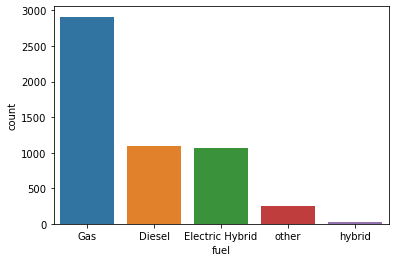

In [170]:
sns.countplot(x=df["fuel"])

In [171]:
df

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
1,14392,Toyota,NaN,NaN,minivan,5.0,Metallic,NaN,Gas,4.0,r,2.4,220000,96,11917
2,9822,Hyundai,H1,2009.0,minivan,0.0,Metallic,1185.0,Diesel,4.0,r,2.5,50653,4,22433
3,17123,Opel,Corsa,NaN,hatchback,5.0,Jet Black,NaN,NaN,4.0,auto,0.0,230000,0,5645
4,11133,Subaru,Outback,2007.0,hatchback,4.0,Sapphire Blue,NaN,Gas,4.0,NaN,2.5,131000,4,10976
6,605,NaN,E 200,1999.0,sedan,2.0,Sapphire Blue,NaN,Gas,4.0,manual,2.0,318406,6,6586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,13158,Mitsubishi,NaN,1997.0,jeep,5.0,NaN,NaN,Gas,4.0,auto,3.5,120000,2,11604
6994,14310,Ford,Escape,2008.0,jeep,5.0,Jet Black,289.0,Electric Hybrid,4.0,others,0.4,451117,0,549
6995,7341,Chevrolet,Orlando,2012.0,jeep,NaN,Gold,642.0,Diesel,0.0,gear,2.0,156802,4,16894
6997,7223,Toyota,NaN,2012.0,sedan,0.0,NaN,781.0,Electric Hybrid,4.0,auto,2.5,314373,12,392


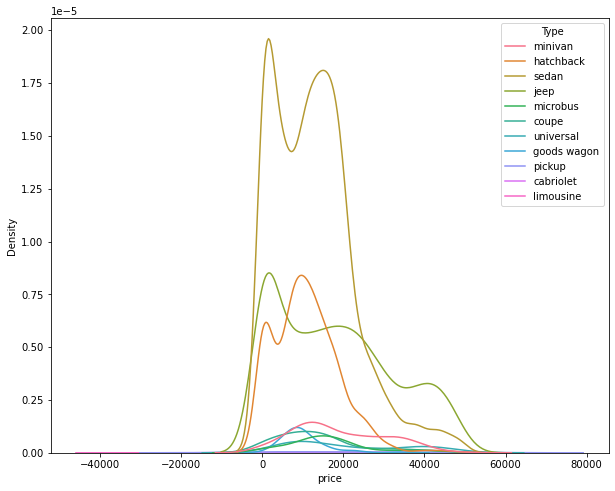

In [174]:
plt.figure(figsize=(10,8))
sns.kdeplot(x=df["price"],hue=df["Type"])
plt.show()

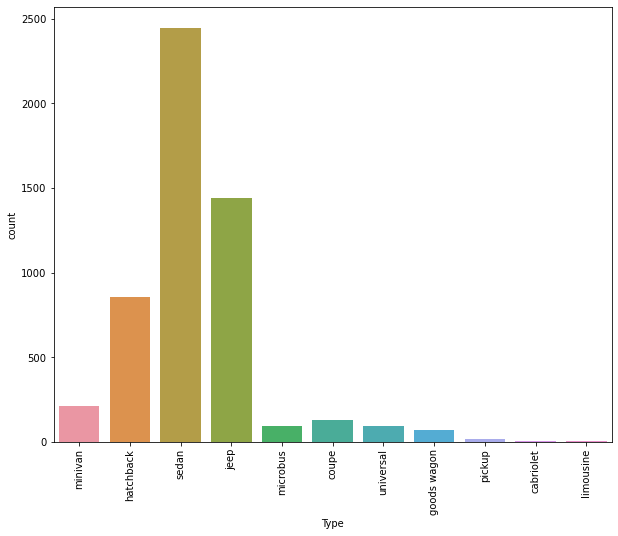

In [177]:
plt.figure(figsize=(10,8))
sns.countplot(x=df["Type"])
plt.xticks(rotation=90)
plt.show()

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   Brand              6294 non-null   object 
 2   VehicleModel       6303 non-null   object 
 3   ManufacturingYear  6285 non-null   float64
 4   Type               6315 non-null   object 
 5   rating             6310 non-null   float64
 6   color              4876 non-null   object 
 7   Duty               4422 non-null   float64
 8   fuel               6304 non-null   object 
 9   CylinderCount      7000 non-null   float64
 10  type of gear       6308 non-null   object 
 11  capacity           7000 non-null   float64
 12  Odometer           7000 non-null   int64  
 13  #airbags           7000 non-null   int64  
 14  price              7000 non-null   int64  
dtypes: float64(5), int64(4), object(6)
memory usage: 820.4+ KB


In [104]:
col=df.columns

In [105]:
brand_filt=df["Brand"]=="Rover"

In [106]:
df.loc[brand_filt,"Brand"]='Land rover'

In [107]:
df.isna().sum()

ID                      0
Brand                 706
VehicleModel          697
ManufacturingYear     715
Type                  685
rating                690
color                2124
Duty                 2578
fuel                  696
CylinderCount           0
type of gear          692
capacity                0
Odometer                0
#airbags                0
price                   0
dtype: int64

In [108]:
c=(0.48366628618847957, 0.1286467902201389, 0.31317188565991266)


In [109]:
#df["ManufacturingYear"]=np.log(df["ManufacturingYear"])

In [110]:
#df["Duty"]=np.log(df["Duty"])

In [111]:
import scipy.stats as stats

#df["Odometer"] = df["Odometer"] + 1
#df["Odometer"], optimal_lambda = stats.boxcox(df["Odometer"], lmbda=None)

#df["capacity"] = df["capacity"] + 1
#df["capacity"], optimal_lambda = stats.boxcox(df["capacity"], lmbda=None)

#df["#airbags"] = df["#airbags"] + 1
#df["#airbags"], optimal_lambda = stats.boxcox(df["#airbags"], lmbda=None)

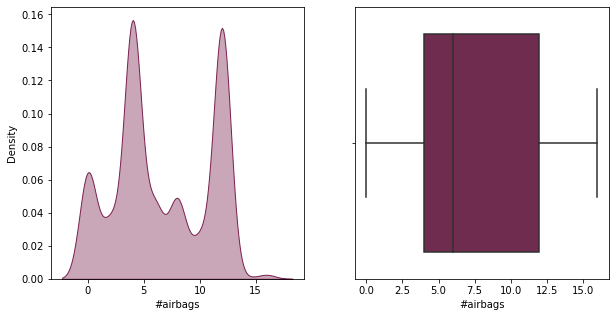

In [184]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(x=df["#airbags"],fill=True,color=c,alpha=0.4,ax=ax[0])
sns.boxplot(x=df["#airbags"],color=c,ax=ax[1])
plt.show()

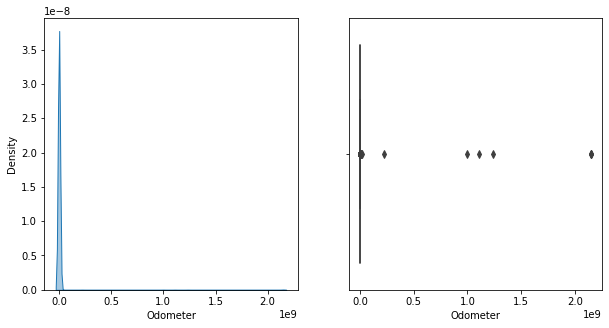

In [185]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(x=df["Odometer"],fill=True,alpha=0.4,ax=ax[0])
sns.boxplot(x=df["Odometer"],ax=ax[1])
plt.show()


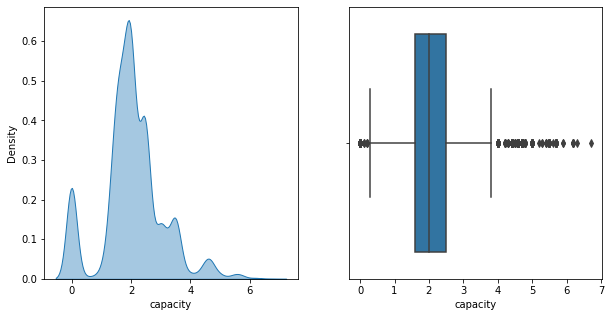

In [114]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(x=df["capacity"],fill=True,alpha=0.4,ax=ax[0])
sns.boxplot(x=df["capacity"],ax=ax[1])
plt.show()



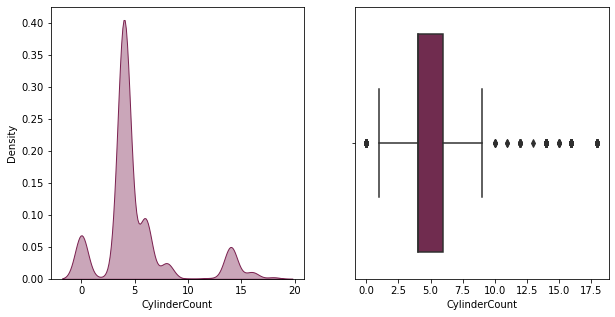

In [115]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(x=df["CylinderCount"],fill=True,color=c,alpha=0.4,ax=ax[0])
sns.boxplot(x=df["CylinderCount"],color=c,ax=ax[1])
plt.show()

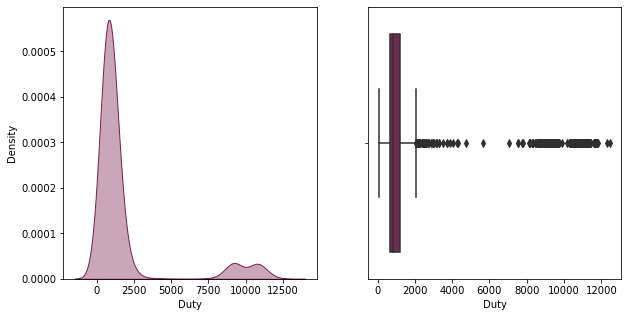

In [116]:

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(x=df["Duty"],fill=True,color=c,alpha=0.4,ax=ax[0])
sns.boxplot(x=df["Duty"],color=c,ax=ax[1])
plt.show()

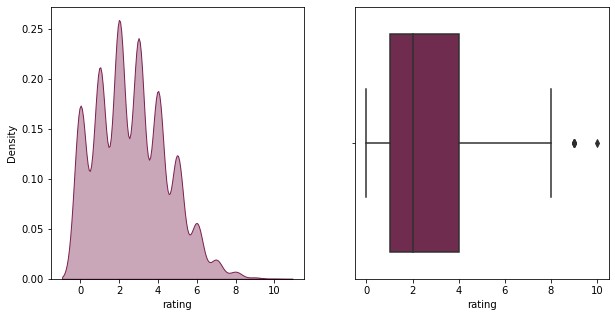

In [117]:

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(x=df["rating"],fill=True,color=c,alpha=0.4,ax=ax[0])
sns.boxplot(x=df["rating"],color=c,ax=ax[1])
plt.show()

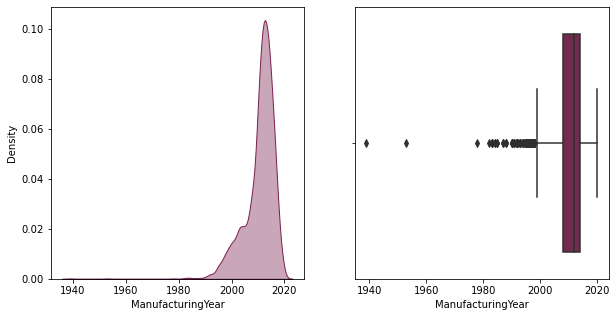

In [183]:

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.kdeplot(x=df["ManufacturingYear"],fill=True,color=c,alpha=0.4,ax=ax[0])
sns.boxplot(x=df["ManufacturingYear"],color=c,ax=ax[1])
plt.show()

In [143]:
filt=df["Duty"]>6000
idx=df.loc[filt,"Duty"].index

In [145]:
df.drop(idx,axis=0,inplace=True)

In [146]:
filt=df["ManufacturingYear"]>2024
idx=df.loc[filt,"ManufacturingYear"].index

In [148]:
df.drop(idx,axis=0,inplace=True)

In [179]:
filt=df["#airbags"]>20
idx=df.loc[filt,"#airbags"].index

In [180]:
df.drop(idx,axis=0,inplace=True)

In [182]:
filt=df["ManufacturingYear"]<1920
idx=df.loc[filt,"ManufacturingYear"].index
df.drop(idx,axis=0,inplace=True)

In [119]:
def clean_fuel(df):
    filt1=df["fuel"]=="Natural Gas"
    df.loc[filt1,"fuel"]="Gas"
    filt2=df["fuel"]=="Dies"
    df.loc[filt2,"fuel"]="Diesel"
    filt3=df["fuel"]=="hyb"
    df.loc[filt3,"fuel"]="hybrid"
    filt4=df["fuel"]=="others"
    df.loc[filt4,"fuel"]="other"
    return df
def clean_manufactur(df):
    year_sp=df["ManufacturingYear"].apply(lambda x:x.split("-") if isinstance(x, str) else np.nan)

    year_sp=year_sp.apply(lambda x: x[-1] if isinstance(x, list) else np.nan)
    year_sp=year_sp.apply(lambda x:re.sub(r"[a-zA-Z]", '', x) if isinstance(x, str) else np.nan)
    year_sp=year_sp.apply(lambda x:re.sub(r'[^a-zA-Z0-9\s]', '',x) if isinstance(x, str) else np.nan)
    df["year"]=year_sp
    df["year"]=pd.to_numeric(df['year'], errors='coerce',downcast="integer")
    year_filt=df["year"]>2024
    df.loc[year_filt,"year"]=np.nan
    year_filt2=df["year"]<1600
    df.loc[year_filt2,"year"]=np.nan
    df["ManufacturingYear"]=df["year"]
    df.drop("year",inplace=True,axis=1)
    return df
def clean_type(df):
    typo=df["Type"]
    chars=['1','2','3','4','5','6','7','8','9','0',"WOOW"]
    for c in chars:
        typo=typo.apply(lambda x:x.replace(c,'') if isinstance(x, str) else np.nan)
    typo=typo.apply(lambda x:x.lower() if isinstance(x, str) else np.nan)
    typo=typo.apply(lambda x:x.strip() if isinstance(x, str) else np.nan)
    df["Type"]=typo
    return df
def clean_rating(df):
    rat_filt=df["rating"]
    rat_filt=rat_filt.apply(lambda x:-x if x<0 else x)
    df["rating"]=rat_filt
    return df
def clean_cyl(df):
    cyl=df["CylinderCount"]
    cyl=cyl.apply(lambda x:x.replace(" cyl",''))
    df["CylinderCount"]=cyl
    df["CylinderCount"]=pd.to_numeric(df['CylinderCount'], errors='coerce')
    return df
def clean_gear(df):
    df["type of gear"]=df["type of gear"].apply(lambda x:x.lower() if isinstance(x, str) else np.nan)
    #gear_filt=df["type of gear"].isin(["r","gear"])
    #df.loc[gear_filt,"type of gear"]="others"
    return df
def clean_cap(df):
    df["capacity"]=df["capacity"].apply(lambda x:x.replace("Turbo",'') if isinstance(x, str) else np.nan)
    df["capacity"]=df["capacity"].apply(lambda x:x.replace(" ",'') if isinstance(x, str) else np.nan)
    df["capacity"]=pd.to_numeric(df['capacity'], errors='coerce')
    return df
def clean_odo(df):
    df["Odometer"]=df["Odometer"].apply(lambda x:re.sub(r"[a-zA-Z]", '', x) if isinstance(x, str) else np.nan)
    df["Odometer"]=df["Odometer"].apply(lambda x:x.replace(" ",'') if isinstance(x, str) else np.nan)
    df["Odometer"]=pd.to_numeric(df['Odometer'], errors='coerce')
    return df
def clean_airbags(df):
    df["#airbags"]=df["#airbags"].apply(lambda x:re.sub(r"[a-zA-Z]", '', x))
    df["#airbags"]=df["#airbags"].apply(lambda x:re.sub(r'[^a-zA-Z0-9\s]', '', x))
    df["#airbags"]=df["#airbags"].apply(lambda x:x.replace(" ",'') if isinstance(x, str) else np.nan)
    df["#airbags"]=pd.to_numeric(df['#airbags'], errors='coerce')
    return df
def clean_duty(df):
    df["Duty"]=df["Duty"].apply(lambda x:re.sub(r"[a-zA-Z]", '', x) if isinstance(x, str) else np.nan)
    df["Duty"]=df["Duty"].apply(lambda x:re.sub(r'[^a-zA-Z0-9\s]', '', x) if isinstance(x, str) else np.nan)
    df["Duty"]=pd.to_numeric(df['Duty'], errors='coerce')
    return df
def clean_vehicle(df):
    rep=["my model which is ","is the best","I own","I have the fasetes model ever.. yes you got it right it's ","I have the fastest model ever.. yes you got it right it's "]
    for c in rep:
        df["VehicleModel"]=df["VehicleModel"].apply(lambda x:x.replace(c,"") if isinstance(x, str) else np.nan)
    df["VehicleModel"]=df["VehicleModel"].apply(lambda x:x.strip() if isinstance(x, str) else np.nan)
    df["VehicleModel"]=df["VehicleModel"].apply(lambda x:x.capitalize() if isinstance(x, str) else np.nan)
    demo=df["VehicleModel"]
    demo=pd.to_numeric(demo, errors='coerce')
    filt=demo>0
    df.loc[filt,"VehicleModel"]="other"
    return df
def clean_brand(df):
    df["Brand"]=df["Brand"].apply(lambda x:x.replace("I love ","") if isinstance(x, str) else np.nan)
    df["Brand"]=df["Brand"].apply(lambda x:x.replace(" is the best","") if isinstance(x, str) else np.nan)
    df["Brand"]=df["Brand"].apply(lambda x:x.capitalize() if isinstance(x, str) else np.nan)
    brand_filt=df["Brand"]=="Rover"
    df.loc[brand_filt,"Brand"]='Land rover'
    return df
def scale(df):
    df["Duty"]=np.log(df["Duty"])
    df["ManufacturingYear"]=np.log(df["ManufacturingYear"])
    df["Odometer"] = df["Odometer"] + 1
    df["Odometer"], optimal_lambda = stats.boxcox(df["Odometer"], lmbda=None)

    df["capacity"] = df["capacity"] + 1
    df["capacity"], optimal_lambda = stats.boxcox(df["capacity"], lmbda=None)

    df["#airbags"] = df["#airbags"] + 1
    df["#airbags"], optimal_lambda = stats.boxcox(df["#airbags"], lmbda=None)
    return df

def clean_all(df):
    df=clean_fuel(df)
    df=clean_manufactur(df)
    df=clean_type(df)
    df=clean_rating(df)
    df=clean_cyl(df)
    df=clean_gear(df)
    df=clean_cap(df)
    df=clean_odo(df)
    df=clean_airbags(df)
    df=clean_duty(df)
    df=clean_vehicle(df)
    df=clean_brand(df)
    df=scale(df)
    return df

In [120]:
df.isna().sum()

ID                      0
Brand                 706
VehicleModel          697
ManufacturingYear     715
Type                  685
rating                690
color                2124
Duty                 2578
fuel                  696
CylinderCount           0
type of gear          692
capacity                0
Odometer                0
#airbags                0
price                   0
dtype: int64

In [121]:
#df.loc[df["#airbags"]>130,"#airbags"]=np.nan

[]

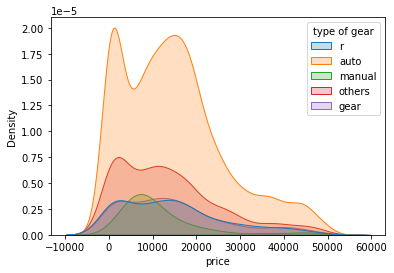

In [122]:
sns.kdeplot(x=df["price"],hue=df["type of gear"],fill=True)
plt.plot()

In [123]:
df

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,Mazda 6 touring,2017.0,sedan,0.0,NaN,1249.0,Gas,4.0,r,2.5,75492,1008,21012
1,14392,Toyota,NaN,NaN,minivan,5.0,Metallic,NaN,Gas,4.0,r,2.4,220000,96,11917
2,9822,Hyundai,H1,2009.0,minivan,0.0,Metallic,1185.0,Diesel,4.0,r,2.5,50653,4,22433
3,17123,Opel,Corsa,NaN,hatchback,5.0,Jet Black,NaN,NaN,4.0,auto,0.0,230000,0,5645
4,11133,Subaru,Outback,2007.0,hatchback,4.0,Sapphire Blue,NaN,Gas,4.0,NaN,2.5,131000,4,10976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,7341,Chevrolet,Orlando,2012.0,jeep,NaN,Gold,642.0,Diesel,0.0,gear,2.0,156802,4,16894
6996,5105,Bmw,X5,2114.0,jeep,2.0,Pearl White,915.0,Diesel,6.0,auto,3.0,110715,0,16621
6997,7223,Toyota,NaN,2012.0,sedan,0.0,NaN,781.0,Electric Hybrid,4.0,auto,2.5,314373,12,392
6998,12184,Toyota,Camry,2112.0,sedan,1.0,Metallic,781.0,Gas,14.0,r,2.5,80000,12,17249


In [124]:
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

In [125]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)


In [126]:
x=df["Odometer"].unique()

In [155]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

class impute_missing(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,x,y=None):
        self.loc_unique = x['Brand'].unique()
        self.num_col = x.select_dtypes(exclude='object').columns
        self.cat_col = x.select_dtypes(include='object').columns
        self.impute_data={}
        for col in self.num_col:
            self.impute_data[col]={}
            for loc in self.loc_unique:
                filt = x['Brand'].isin([loc])
                med = x[filt][col].median()
                self.impute_data[col][loc]=med
    
        for col in self.cat_col:
            self.impute_data[col]={}
            for loc in self.loc_unique:
                filt = x['Brand'].isin([loc])
                if x[filt][col].empty:
                    continue 
                mode = x[filt][col].mode()
                if not mode.empty:
                    med = mode[0]
                    self.impute_data[col][loc]=med
                else:
                    self.impute_data[col][loc]=None
        return self
    def transform(self,x,y=None):
        X=x.copy()
        for col in self.num_col:
            for loc in self.loc_unique:
                filt=X['Brand'].isin([loc])
                X.loc[filt, col] = X[filt][col].fillna(self.impute_data[col][loc])
        
        for col in self.cat_col:
            for loc in self.loc_unique:
                filt=X['Brand'].isin([loc])
                val=self.impute_data[col][loc]
                if val is not None:
                    X.loc[filt, col] = X[filt][col].fillna(val)
        return X

               
class HandleOutliersIQR(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.num_col = X.select_dtypes(exclude='object').columns
        self.rem_limit = {}
        self.med={}
        for col in self.num_col:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            val = 1.5 * IQR
            self.rem_limit[col] = (Q1 - val, Q3 + val)
            filt=X[col]<(Q3 + val)
            self.med[col]=X.loc[filt,col].median()
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        for col in self.num_col:
            lower_limit, upper_limit = self.rem_limit[col]
            
            X[col] = X[col].apply(lambda x: self.med[col] if x < lower_limit or x > upper_limit else x)
        return X

num_pipeline = Pipeline([
     
  # ('handle_outliers', HandleOutliersIQR()),
    ('simple_imputer', IterativeImputer()),
  #  ("ploy",PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler())
])



cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=7001)),
    ('scaler', MinMaxScaler())
])



impute_missing=impute_missing()
OHE=OneHotEncoder()
preprocessing = ColumnTransformer([
   # ("impute",impute_missing,['Brand', 'VehicleModel', 'ManufacturingYear', 'Type', 'Duty', 'fuel','capacity', '#airbags']),
    ('num_pipeline', num_pipeline, [  'ManufacturingYear', 'Duty', "#airbags",'CylinderCount',"Odometer", 'capacity']),
   # ("xxx",ohe,["type of gear","fuel"]),
    ('cat_pipeline', cat_pipeline, [ 'VehicleModel', 'Type', 'fuel',"type of gear"])
], remainder='drop', n_jobs=-1)

preprocessing

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('simple_imputer',
                                                  IterativeImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['ManufacturingYear', 'Duty', '#airbags',
                                  'CylinderCount', 'Odometer', 'capacity']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=7001)),
                                                 ('scaler', MinMaxScaler())]),
                                 ['VehicleModel', 'Type', 'fuel',
                                  'type of gear'])])

In [156]:
from sklearn.neighbors import KNeighborsRegressor

In [186]:
x_train=df.drop("price",axis=1)
#x_train["demo"]=x_train["Duty"]/x_train["CylinderCount"]
#x_train["try"]=x_train["CylinderCount"]*x_train["capacity"]
#x_train=impute_missing.fit_transform(x_train)
x_train.isna().sum()

ID                      0
Brand                 541
VehicleModel          534
ManufacturingYear     605
Type                  529
rating                535
color                1629
Duty                 2096
fuel                  533
CylinderCount           0
type of gear          509
capacity                0
Odometer                0
#airbags                0
dtype: int64

In [187]:
#df.drop("ID",axis=1,inplace=True)
x_train=x_train.drop(['ID','color',"rating",'Brand'],axis=1)
y_train=df["price"]

In [188]:
x_train.columns

Index(['VehicleModel', 'ManufacturingYear', 'Type', 'Duty', 'fuel',
       'CylinderCount', 'type of gear', 'capacity', 'Odometer', '#airbags'],
      dtype='object')

In [189]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


In [190]:
x_train=preprocessing.fit_transform(x_train)

In [191]:
#x_train=pca_pipe.fit_transform(x_train)

In [192]:
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor

In [193]:
models=[
        RandomForestRegressor(random_state=42,n_estimators=100,min_samples_split=15),
        KNeighborsRegressor(),
        SVR(kernel="poly", degree=3, C=0.01, epsilon=0.1),
        LinearRegression(),
        ExtraTreesRegressor(random_state = 42,n_estimators=120),
        DecisionTreeRegressor()

  ]

In [194]:
x_train

array([[-0.28281131,  0.56932953, -0.60265079, ...,  0.7       ,
         0.        ,  1.        ],
       [-0.35359199, -0.83308651, -1.53491573, ...,  0.3       ,
         0.5       ,  0.        ],
       [-0.65622583,  0.47008675, -0.60265079, ...,  0.3       ,
         0.5       ,  0.        ],
       ...,
       [ 0.27731047, -0.82901083, -0.60265079, ...,  0.4       ,
         0.        ,  0.25      ],
       [ 0.27731047, -0.4710563 ,  1.26187909, ...,  0.9       ,
         0.25      ,  0.        ],
       [ 0.27731047, -0.82901083, -0.60265079, ...,  0.9       ,
         0.5       ,  0.        ]])

In [195]:
for model in models:
    scores = cross_val_score(model, x_train, y_train,scoring="neg_mean_absolute_error", cv=5)
    scores = -scores
    print(model)
    print(scores)
    print('___________________________________')

RandomForestRegressor(min_samples_split=15, random_state=42)
[5939.74300286 5936.51281786 6116.6768108  5836.92474409 5806.9879572 ]
___________________________________
KNeighborsRegressor()
[7012.7788785  7001.20261682 7094.60449018 6701.29373246 6980.88175865]
___________________________________
SVR(C=0.01, kernel='poly')
[9317.64063009 9351.00747021 9189.95895098 9106.74952991 8817.1911612 ]
___________________________________
LinearRegression()
[8623.89156139 8679.68854343 8784.10788277 8681.85446959 8341.65845926]
___________________________________
ExtraTreesRegressor(n_estimators=120, random_state=42)
[5571.30600078 5824.36156412 5767.18468974 5557.58932543 5685.92734903]
___________________________________
DecisionTreeRegressor()
[7129.24859813 7436.32429907 7201.56937948 7019.22918616 7466.63751169]
___________________________________


In [ ]:
from sklearn.model_selection import learning_curve
rf=RandomForestRegressor(random_state=42,n_estimators=60,min_samples_split=5)
train_sizes,train_scores,valid_scores=learning_curve(voting_reg,x_train,y_train,cv=5,scoring="neg_mean_absolute_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend()
plt.show()

In [167]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor

In [196]:
linear_reg = DecisionTreeRegressor()

svr_reg = SVR(kernel='rbf')  # You can choose different kernels if needed
xgb_reg =ExtraTreesRegressor(n_estimators=120, random_state=42)
rf_reg = RandomForestRegressor(random_state=42)
voting_reg = VotingRegressor(estimators=[('linear', linear_reg), ("x",xgb_reg), ('svr', svr_reg), ('rf', rf_reg)],
                             n_jobs=5)

#voting_reg.fit(x_train, y_train)

In [ ]:
test2=pd.read_csv("Test2.csv")
test2.isna().sum()

In [ ]:
test2=clean_all(test2)
test2=impute_missing.transform(test2)
test2.isna().sum()

In [ ]:
test=pd.read_csv("Test2.csv")
test=clean_all(test)
test=impute_missing.transform(test)

test.drop(['ID','color',"rating",'Brand', 'capacity'],inplace=True,axis=1)

In [ ]:
impute_missing.impute_data

In [ ]:
test=preprocessing.transform(test)

In [ ]:
rf=ExtraTreesRegressor(random_state = 42)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
pred=rf.predict(test)

In [ ]:
test2=pd.read_csv("Test2.csv")


In [ ]:
ID=test2["ID"]

In [ ]:
pred_df = pd.DataFrame({"ID":ID,'Price':pred}) #Creating prediction dataset


In [ ]:
pred_df.to_csv('Prediction7.csv',index=False)

In [ ]:
p1=pd.read_csv('Prediction7.csv')
p1

In [ ]:
p2=pd.read_csv('Prediction6.csv')
p2

In [ ]:
cor=df.corr(numeric_only=True)

In [ ]:
sns.heatmap(cor)

In [ ]:
p = pd.DataFrame({"p1":pred_df["Price"],'p2':p2["Price"]}) #Creating prediction dataset
p["diff"]=p["p2"]-p["p1"]

In [ ]:
p

In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor


# Base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Meta model
meta_model = LinearRegression()

# Create the stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

scores = cross_val_score(stacking_model, x_train, y_train,scoring="neg_mean_absolute_error", cv=5)
scores = -scores

print(scores)
print('___________________________________')
